### Project Description

This dataset is of the clients of a wholesale distributor. It includes the monetary values of annual spending on diverse product categories. Dataset has 440 rows in total. The data has following features:

- **Channel-** Retail Channel

- **Region-** Regions

- **Fresh-** Annual spending on fresh products

- **Milk-** Annual spending on milk products

- **Grocery-** Annual spending on grocery products

- **Frozen-** Annual spending on frozen products

- **Detergents_Paper-** Annual spending on detergents and paper products

- **Delicassen-** Annual spending on delicatessen products

Using this information we need to describe the variation in the different types of customers that a wholesale distributor interacts with

### EDA

In this section we will get the overview of the data and visualize the features using differernt plots 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

customers = pd.read_csv('Customers.csv')
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


#### Explore features

In [2]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


We have all the integer values in the columns. There are 440 rows

In [3]:
print(customers['Channel'].unique())
print(customers['Region'].unique())

[2 1]
[3 1 2]


There are 2 groups in `Channel` and 3 different groups in `Region`

In [4]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh has highest value of std. deviation, it can give us more insights in the prediction.

Delicassen has lowest std. deviation, it might explain less variance or feature with least importance

In [5]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There are no null values in the data

#### Plotting Features

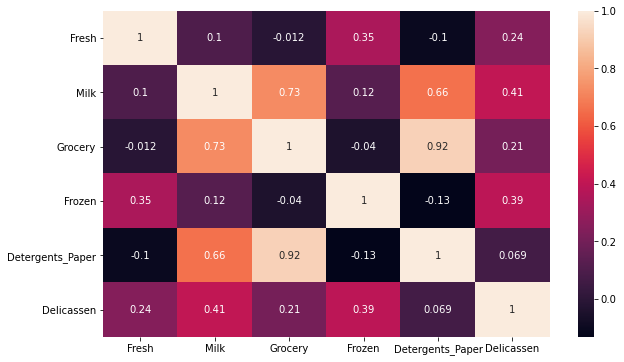

In [6]:
## Correlation plot

plt.figure(figsize=(10,6))
sns.heatmap(customers.drop(['Channel','Region'], axis=1).corr(),annot=True)
plt.show()

Detergents_Paper and Grocery have highest positive correlation, whereas it is most negatively correlated with Frozen column.
It also has good correlation with Milk

Grocery and Milk are also very well correlated

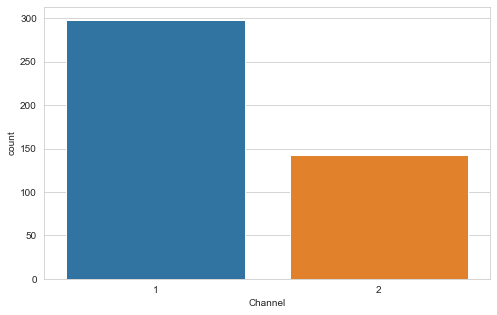

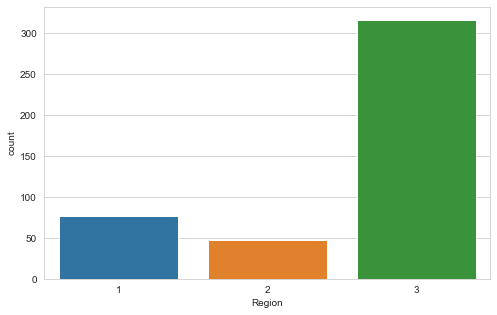

In [8]:
## Count of Channel and Region groups

colmns = ['Channel','Region']
for col in colmns:
    sns.set_style("whitegrid")
    plt.figure(figsize = (8,5))
    sns.countplot(x=customers[col], data=customers) 
    plt.show()

Majority of the values in Channel column belong to group 1 almost near to 300 values, group 2 has only around 150 values, we can say that majority of customer belong to type 1 channel.

In the Region column, majority values belong to region 3 more than 300 values. Region 2 values are least less than 50, whereas region 1 less than 100

<AxesSubplot:xlabel='Channel', ylabel='count'>

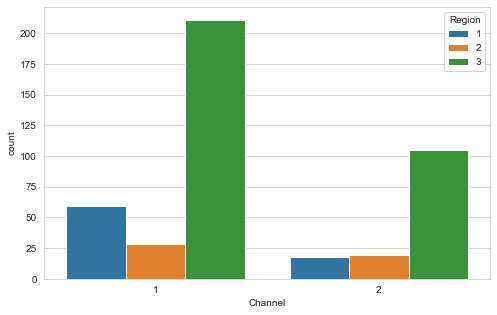

In [10]:
## Count of Channels by Regions

plt.figure(figsize = (8,5))
sns.set_style('whitegrid')
sns.countplot(x="Channel",hue='Region',data=customers)

Most of the customers of type 1 & 2 belong to Region 3

<Figure size 576x576 with 0 Axes>

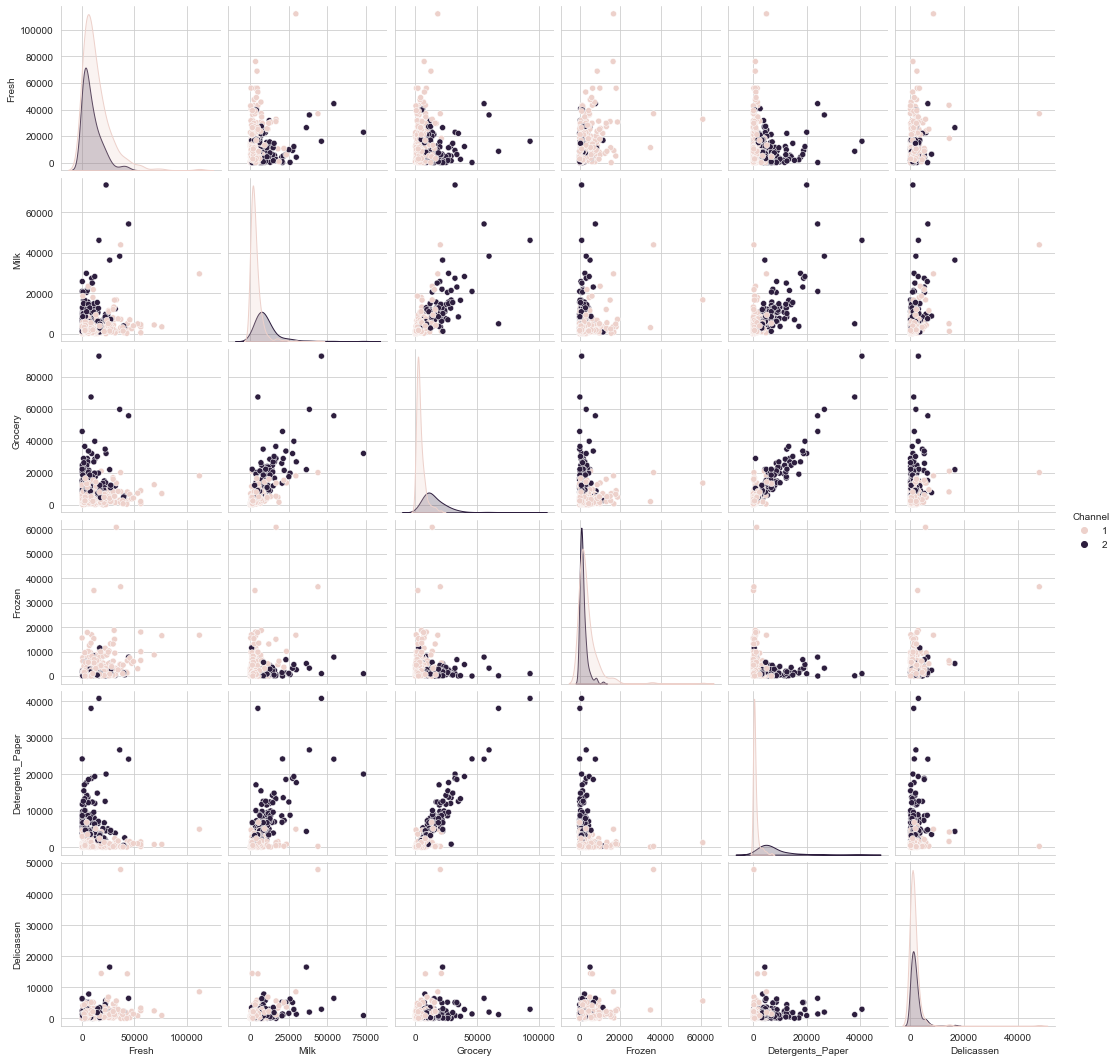

In [12]:
plt.figure(figsize=(8,8))
sns.pairplot(data=customers.drop('Region',axis=1), hue='Channel')
plt.show()

We can observe some skewness in the data, the data is not normally distributed

### Feature Scaling

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_columns = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']

scaled_min_max = MinMaxScaler().fit_transform(customers[numerical_columns])

scaled_std = StandardScaler().fit_transform(customers[numerical_columns])


In [14]:
scaled_cols = ['Fresh_scaled','Milk_scaled','Grocery_scaled', 'Frozen_scaled',
       'Detergents_Paper_scaled', 'Delicassen_scaled']

df_minmax = pd.DataFrame(scaled_min_max, columns = scaled_cols)

df_std = pd.DataFrame(scaled_std, columns =scaled_cols )

In [15]:
df_minmax.head()

,Fresh_scaled,Milk_scaled,Grocery_scaled,Frozen_scaled,Detergents_Paper_scaled,Delicassen_scaled
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093


In [16]:
df_std.head()

,Fresh_scaled,Milk_scaled,Grocery_scaled,Frozen_scaled,Detergents_Paper_scaled,Delicassen_scaled
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


we can see the negative values in the amounts of scaled columns, since values cannot be negative we will choose **MinMaxScaler values dataset**

#### Plotting the scaled data from MinMaxScaler

<AxesSubplot:ylabel='Frequency'>

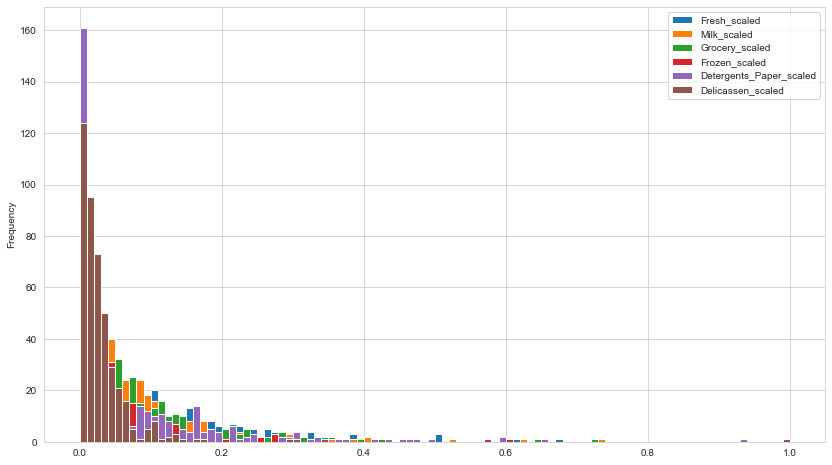

In [31]:
df_minmax.plot(kind= 'hist',bins=100, figsize = (14,8))

#### Plotting the scaled data from StandardScaler

<AxesSubplot:ylabel='Frequency'>

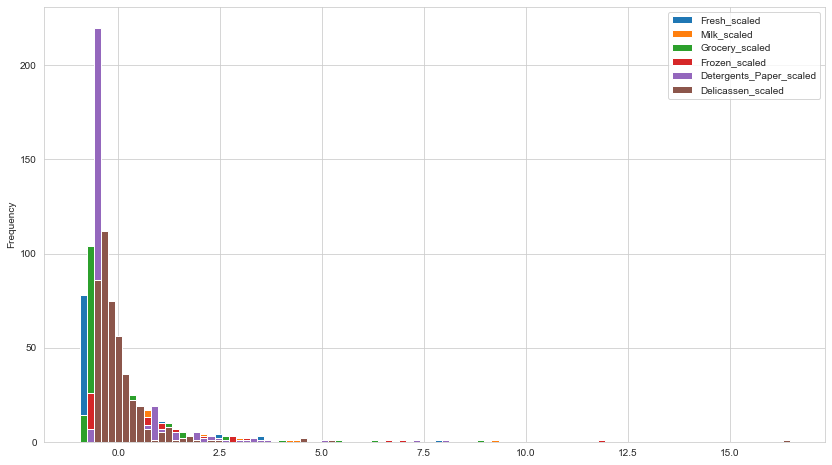

In [32]:
df_std.plot(kind= 'hist',bins=100, figsize = (14,8))

From the two histogram plot we can see that the values in the Standard Sclaer lies left to zero as well i.e. negative values also occur

Whereas in MinMaxScaler the values lies between 0 and 1 only

### Implement RFECV

In [44]:
df_minmax['Region'] = customers['Region']
df_minmax.head()

,Fresh_scaled,Milk_scaled,Grocery_scaled,Frozen_scaled,Detergents_Paper_scaled,Delicassen_scaled,Region
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,3
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,3
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,3


In [45]:
df_minmax['Channel'] = customers['Channel']
df_minmax.head()

,Fresh_scaled,Milk_scaled,Grocery_scaled,Frozen_scaled,Detergents_Paper_scaled,Delicassen_scaled,Region,Channel
0,0.112940,0.130727,0.081464,0.003106,0.065427,0.027847,3,2
1,0.062899,0.132824,0.103097,0.028548,0.080590,0.036984,3,2
2,0.056622,0.119181,0.082790,0.039116,0.086052,0.163559,3,2
3,0.118254,0.015536,0.045464,0.104842,0.012346,0.037234,3,1
4,0.201626,0.072914,0.077552,0.063934,0.043455,0.108093,3,2


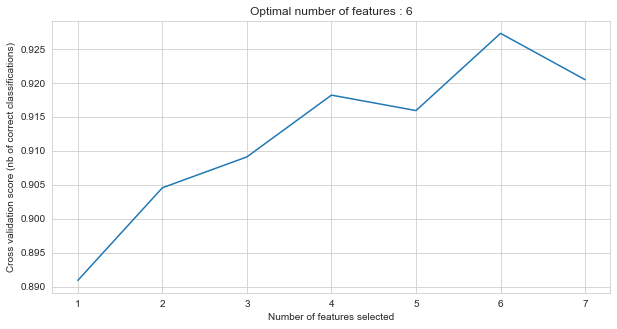

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

data = df_minmax[['Region','Fresh_scaled','Milk_scaled','Grocery_scaled','Frozen_scaled','Detergents_Paper_scaled','Delicassen_scaled']]
target = df_minmax['Channel']

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(data,target)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

We used RFECV to recursive eliminate features, cross-validate the model at each stage, and keep a record of the relationship between model score and number of features.
 
From the above graph we can say that optimal number of features are 6 as cross validation score decreases after the 6 features

### K-means clustering and Elbow method

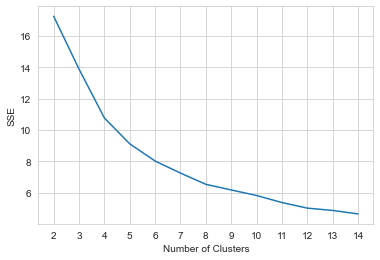

In [99]:
## Using Elbow method to find the optimal number of clusters

#initialize kmeans parameters
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data.drop(['Region'], axis =1))
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(2, 15), sse)
plt.xticks(range(2, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In this elbow plot we see that there is bend at value 4, i.e optimal no of custers is 4

#### Using optimal k value implement k-means

In [134]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

## Building and Running your model

clustering = KMeans(n_clusters=4, random_state=5)

clustering.fit(data.drop(['Region'], axis =1))

KMeans(n_clusters=4, random_state=5)

### Plotting your model outputs

Text(0.5, 1.0, 'K-Means Classification')

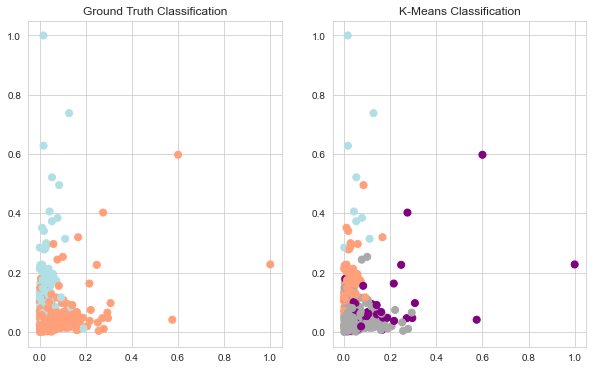

In [135]:
color_theme = np.array(['darkgray','lightsalmon', 'powderblue','purple'])
#relabel = np.choose(clustering.labels_, [1,2]).astype(np.int64)

plt.figure(figsize = (10,6))
plt.subplot(1,2,1)

plt.scatter(x= data['Frozen_scaled'], y= data['Milk_scaled'], c=color_theme[target], s=50)
plt.title('Ground Truth Classification')

plt.subplot(1,2,2)

plt.scatter(x= data['Frozen_scaled'], y= data['Milk_scaled'], c=color_theme[clustering.labels_], s=50)
plt.title('K-Means Classification')

From the above graphs we can see that the in the actual data we have 2 different groups, after applying K-means clustering for 4 clusters we can see that how all the points are re-assigned to new cluster groups

### Implement PCA

In [129]:
from sklearn import decomposition
from sklearn.decomposition import PCA

In [136]:
pca = decomposition.PCA()
data_pca = pca.fit_transform(data.drop(['Region'], axis =1))

pca.explained_variance_ratio_

array([0.51948323, 0.26407007, 0.106061  , 0.06258016, 0.03497422,
       0.01283132])

In [137]:
pca.explained_variance_ratio_.sum()

1.0

In [138]:
pca.components_ ##This gives us the feature importances of original features(6) in the PCA components formed(6)

array([[-0.018545  ,  0.49047312,  0.57644674, -0.01741587,  0.647882  ,
         0.08213992],
       [ 0.86387717,  0.18182434, -0.00363933,  0.39690977, -0.12652721,
         0.21701704],
       [-0.50178356,  0.33371506, -0.08680857,  0.65833746, -0.22070584,
         0.38365676],
       [-0.02403365, -0.62796031,  0.19740892,  0.60521878,  0.35050483,
        -0.27744285],
       [-0.00662714, -0.46794556,  0.20894177, -0.20580297,  0.05718506,
         0.83168587],
       [-0.03104894, -0.0412685 ,  0.75995608, -0.01031851, -0.6240232 ,
        -0.17403508]])

PCA components are generated in data_pca with 6 columns and 440 rows

#### The variance explained by first two and four components are as follows

In [139]:
print(sum(pca.explained_variance_ratio_[0:2]))
print(sum(pca.explained_variance_ratio_[0:4]))

0.7835533021025842
0.9521944596264822


This implies first four components explains about 95% variance in the data, whereas first two components explains 78% of the variance

In [144]:
comps = pd.DataFrame(pca.components_, columns=[numerical_columns])
comps

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,-0.018545,0.490473,0.576447,-0.017416,0.647882,0.082140
1,0.863877,0.181824,-0.003639,0.396910,-0.126527,0.217017
2,-0.501784,0.333715,-0.086809,0.658337,-0.220706,0.383657
3,-0.024034,-0.627960,0.197409,0.605219,0.350505,-0.277443
4,-0.006627,-0.467946,0.208942,-0.205803,0.057185,0.831686
5,-0.031049,-0.041268,0.759956,-0.010319,-0.624023,-0.174035


In [184]:
C1 = round(comps.iloc[0].sum(),2)
C2 = round(comps.iloc[1].sum(),2)
C3 = round(comps.iloc[2].sum(),2)
C4 = round(comps.iloc[3].sum(),2)
C5 = round(comps.iloc[4].sum(),2)
C6 = round(comps.iloc[5].sum(),2)

Calulated the variances explained by each of the cluster from 0 to 5 in comps

#### Plot the clusters obtained from PCA

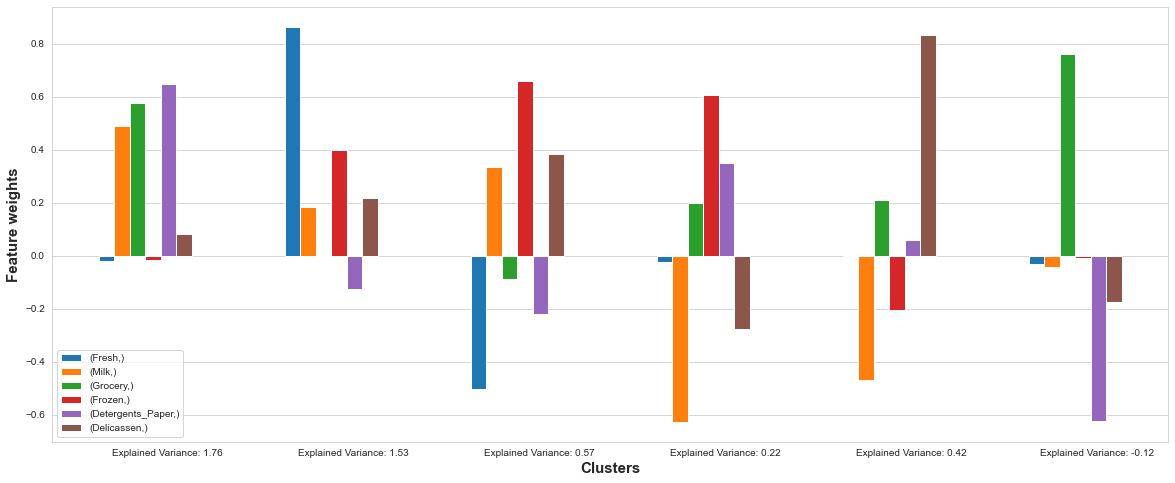

In [260]:

comps.plot(kind='bar', figsize =(20, 8), rot = 0)
plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Feature weights', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(comps))],
    [f'Explained Variance: {C1}',
     f'Explained Variance: {C2}', 
     f'Explained Variance: {C3}', 
     f'Explained Variance: {C4}', 
     f'Explained Variance: {C5}',
     f'Explained Variance: {C6}'])

plt.legend(loc='lower left')
plt.grid(axis = 'x')
plt.show()


In the above bar graph, we have plotted the clusters obtained from PCA, and showcased the total variance explained by each one of them, we can say that **cluster 1 explains the variance in the data most**.

### Implement XGBoost Classifier

In [264]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [266]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from xgboost import XGBClassifier

In [271]:
## Converting values in target columns from [1,2] to [0,1]

## Replace 1's with 0's and 2's with 1's

target = target.map({1: 0, 2: 1})

In [273]:
## Split the data into train and test set

Xtrain, Xtest, ytrain, ytest = train_test_split(data, target, test_size = 0.2, random_state = 1)

#### Hyperparameter tuning



In [268]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [274]:
gb = XGBClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(Xtrain, ytrain.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}

0.901 (+/-0.075) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.892 (+/-0.083) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.898 (+/-0.065) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.906 (+/-0.049) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.901 (+/-0.086) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.904 (+/-0.079) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.901 (+/-0.078) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.906 (+/-0.061) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.901 (+/-0.095) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.906 (+/-0.091) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.901 (+/-0.07) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.901 (+/-0.07) for {'learning_rat

Using GridSearchCV we got the best hyperparameters as 'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250

#### Selecting best parameter and training the model using those

In [275]:
cv_best = cv.best_estimator_

In [276]:
## Fit the model
cv_best.fit(Xtrain, ytrain.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=1, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

#### Calculating predictions on the test set

In [277]:
pred = cv_best.predict(Xtest)

#### Evaluate prediction results

In [278]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.93      0.84      0.88        31

    accuracy                           0.92        88
   macro avg       0.92      0.90      0.91        88
weighted avg       0.92      0.92      0.92        88



From the performance metrics we see that the precision of the classifier is about 0.92, recall is 0.90, f1-score is 0.91.
The values suggest that the model performs very well on test set and classifies the data accurately.